In [67]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Introduction
This notebook introduces a set of tools for Magic: The Gathering deckbuilding and gameplay decisions. 

## Example Problem

* A deck in limited MTG consists of __40 cards__.
* Assume the deck consists of __17 lands__ and __23 spells__.
* An opening hand consists of __7 cards__, drawn randomly. 
* Calculate the probability of an opening hand consisting of between __2 - 4 lands__. 

## Solution

The __hypergeometric distribution__ describes the probability of binary success and failure in series of trials without replacement.

### Probability Mass Function (PMF)
$
P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}
$

### Cumulative Distribution Function (CDF)
$
P(X \leq k) = \sum_{i=0}^{k} P(X = i)
$

Probability of drawing 2 to 4 lands in a 7-card hand: 0.7945


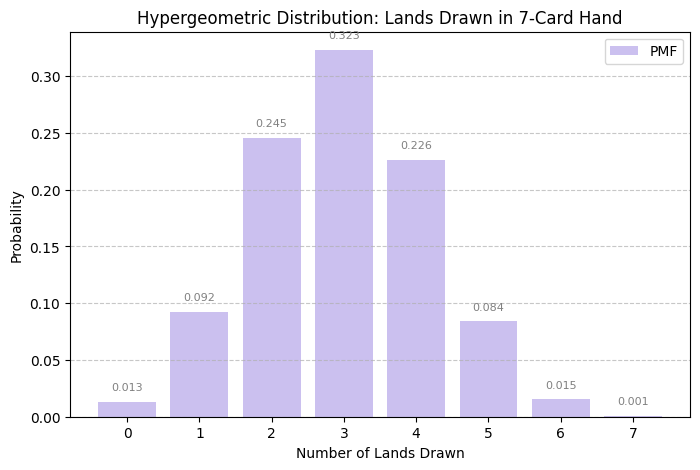

In [68]:
# Define deck parameters
N = 40   # Total cards in deck
K = 17   # Total lands in deck
n = 7    # Cards drawn

# Possible number of lands drawn
k_values = np.arange(0, n+1)
probabilities = stats.hypergeom.pmf(k_values, N, K, n)

# Calculate probability of drawing 2 to 4 lands
prob_2_to_4 = sum(probabilities[2:5])
print(f"Probability of drawing 2 to 4 lands in a 7-card hand: {prob_2_to_4:.4f}")

# Plot the probability distribution
plt.figure(figsize=(8, 5))
plt.bar(k_values, probabilities, color='#B6A6E9', alpha=0.7, label='PMF')
plt.xlabel("Number of Lands Drawn")
plt.ylabel("Probability")
plt.title("Hypergeometric Distribution: Lands Drawn in 7-Card Hand")
plt.xticks(k_values)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with probability values
for i, v in enumerate(probabilities):
    plt.text(k_values[i], v + 0.01, f"{v:.3f}", ha='center', fontsize=8, color='grey')

plt.show()

# Manabase Color Composition

Below is a tool that aids with simulating manabase calculations. 

In [69]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

class CustomLandProbabilities:
    def __init__(self, N=40, n_t2=8, n_t3=9, colors=None, color_sources=None):
        self.N = N   # Total cards in deck
        self.n_t2 = n_t2  # Cards drawn by turn 2
        self.n_t3 = n_t3  # Cards drawn by turn 3
        self.colors = colors or []  # List of color names
        self.color_sources = color_sources or {}  # Mapping of color sources (e.g., 'white': 8, 'blue': 8)
        self.color_palette = {
            'white': '#F9D342',  # Soft golden yellow
            'blue': '#4C80F6',    # Calm blue
            'red': '#F26D6D',     # Muted red
            'green': '#4CAF50',   # Natural green
            'black': '#9B59B6'   # Deep purple
        }


    def prob(self, color, n_required, turn_count):
        """Generalized probability of drawing the required number of sources for a color"""
        color_source = self.color_sources.get(color, 0)
        return sum(stats.hypergeom.pmf(k, self.N, color_source, turn_count) for k in range(n_required, turn_count+1))

    def plot_probabilities(self, color_n_required, turn_counts):
        """Visualize probabilities for different colors and turn counts"""
        fig, axes = plt.subplots(len(self.colors), len(turn_counts), figsize=(12, 10))
        fig.suptitle("Probability of Casting Spells by Turn with Varying Color Sources")

        for i, color in enumerate(self.colors):
            for j, turn_count in enumerate(turn_counts):
                n_required = color_n_required.get(color, 2)  # Default is 2 sources required for the color
                p = self.prob(color, n_required, turn_count)
                
                ax = axes[i, j] if len(self.colors) > 1 else axes[j]
                display_color = color 
                ax.bar([color], [p], color=self.color_palette[color], alpha=0.7)
                ax.set_ylim(0, 1)
                ax.set_ylabel("Probability")
                ax.set_title(f"{color} by Turn {turn_count}")

                ax.text(0, p + 0.02, f"{p:.3f}", ha='center', fontsize=12, color='black')
                ax.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


## Example Usage
Here's a real world problem: 
* We have a 17 land, 40 card deck, with 1 dual land, 8 plains, and 8 islands.
* We want to cast a WW spell on turn 2 and a 1UU spell on turn 3.
* What are our odds?

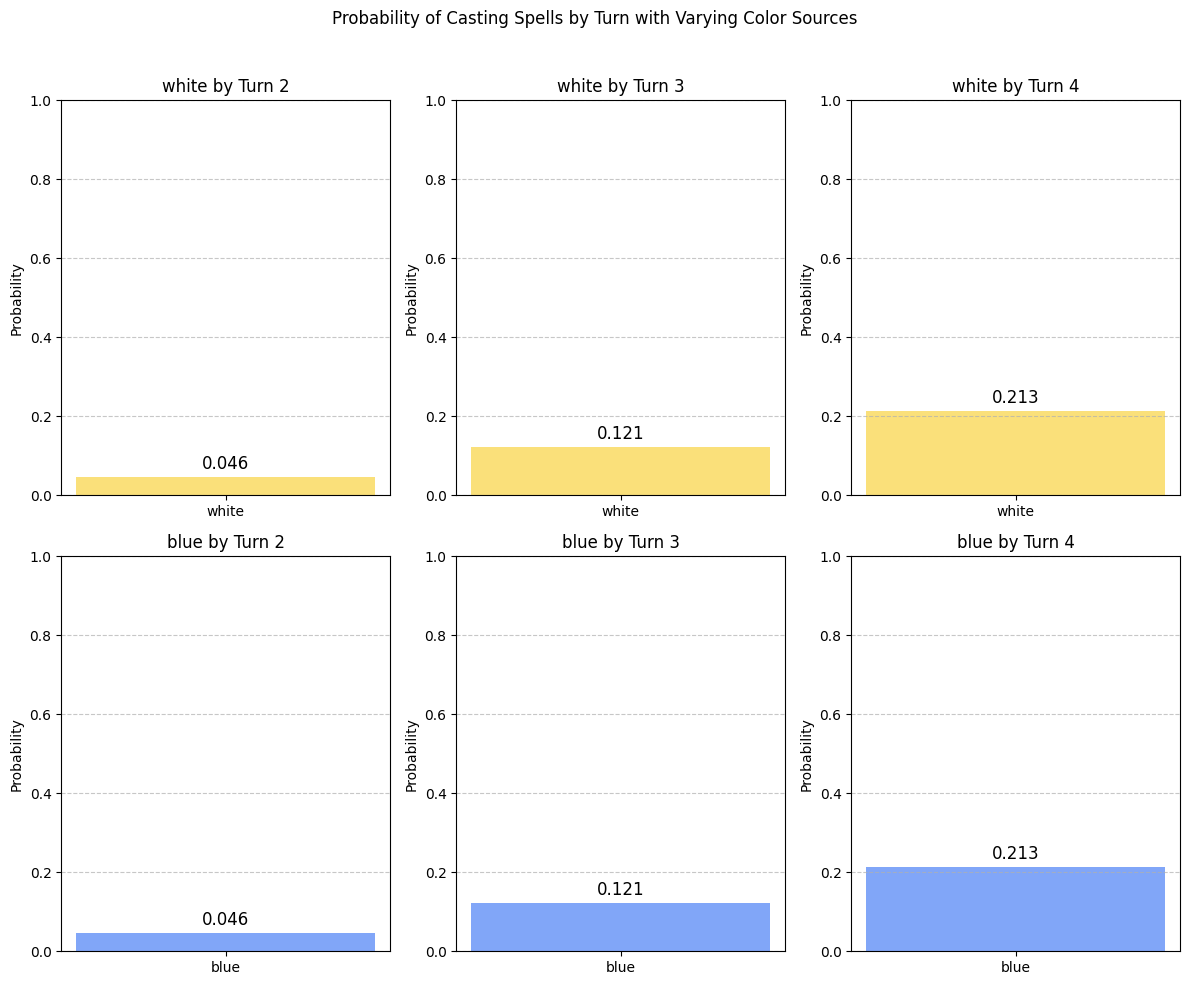

In [70]:
# Using the tool for this
colors = ['white', 'blue']
color_sources = {'white': 9, 'blue': 9}  # Example color source mapping
color_n_required = {'white': 2, 'blue': 2}  # Minimum number of sources required for each color
turn_counts = [2, 3, 4]  # Example turn counts to visualize

azorius = CustomLandProbabilities(colors=colors, color_sources=color_sources)
azorius.plot_probabilities(color_n_required, turn_counts)